In [2]:
import os
import sys
sys.path.append("..")
from model import YModel, OptLoss
from utils import sample_noise, iterate_minibatches, generate_data
from pyro import distributions as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import skopt

NUM_RUNS_PER_CALL = 10
def optimized_function(mu, N=NUM_RUNS_PER_CALL):
    mu = torch.tensor(mu).float().repeat(1, 2)
    x_r = y_sampler.x_dist.sample(torch.Size([len(mu), N]))
    y_sampler.make_condition_sample({'mu': mu, 'X': x_r})

    y = y_sampler.condition_sample()
    return OptLoss.SigmoidLoss(y, 5, 10).mean().item()


y_sampler = YModel()

In [3]:
result_save_to = 'gp_opt_loss_2d.pkl'

In [4]:
import skopt
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_objective, plot_convergence, plot_evaluations

dimensions = [
    Real(name='x', low=-20, high=20, prior='uniform'), 
    Real(name='y', low=-20, high=20, prior='uniform')
]

In [5]:
checkpoint_callback = skopt.callbacks.CheckpointSaver(result_save_to)

res = skopt.gp_minimize(func=optimized_function, 
                        dimensions=dimensions, 
                        verbose=True, 
                        n_random_starts=10,
                        n_calls=1000,
                        n_jobs=-1,
                        callback=[checkpoint_callback])

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0066
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.0380
Current minimum: -0.0380
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.0004
Current minimum: -0.0380
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.2255
Current minimum: -0.2255
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -0.1697
Current minimum: -0.2255
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.6378
Function value obtained: -0.0000
Current minimum: -0.6649
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.5580
Function value obtained: -0.3298
Current minimum: -0.6649
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.6141
Function value obtained: -0.2623
Current minimum: -0.6649
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.7374
Function value obtained: -0.3070
Current minimum: -0.6649
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.5817
Function value obtained: -0.4374
Current minimum: -0.6649
Iteration No: 46 st

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 0.9598
Function value obtained: -0.1874
Current minimum: -0.6649
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 0.9177
Function value obtained: -0.2716
Current minimum: -0.6649
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 0.9487
Function value obtained: -0.2418
Current minimum: -0.6649
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 0.9945
Function value obtained: -0.2226
Current minimum: -0.6649
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 1.1188
Function value obtained: -0.3672
Current minimum: -0.6649
Iteration No: 86 st

Iteration No: 121 ended. Search finished for the next optimal point.
Time taken: 1.8603
Function value obtained: -0.3985
Current minimum: -0.6649
Iteration No: 122 started. Searching for the next optimal point.
Iteration No: 122 ended. Search finished for the next optimal point.
Time taken: 1.8890
Function value obtained: -0.4238
Current minimum: -0.6649
Iteration No: 123 started. Searching for the next optimal point.
Iteration No: 123 ended. Search finished for the next optimal point.
Time taken: 1.9950
Function value obtained: -0.1639
Current minimum: -0.6649
Iteration No: 124 started. Searching for the next optimal point.
Iteration No: 124 ended. Search finished for the next optimal point.
Time taken: 1.9142
Function value obtained: -0.4426
Current minimum: -0.6649
Iteration No: 125 started. Searching for the next optimal point.
Iteration No: 125 ended. Search finished for the next optimal point.
Time taken: 2.0813
Function value obtained: -0.4554
Current minimum: -0.6649
Iteration 

Iteration No: 160 ended. Search finished for the next optimal point.
Time taken: 2.8462
Function value obtained: -0.2858
Current minimum: -0.6649
Iteration No: 161 started. Searching for the next optimal point.
Iteration No: 161 ended. Search finished for the next optimal point.
Time taken: 2.9719
Function value obtained: -0.3128
Current minimum: -0.6649
Iteration No: 162 started. Searching for the next optimal point.
Iteration No: 162 ended. Search finished for the next optimal point.
Time taken: 3.0392
Function value obtained: -0.1260
Current minimum: -0.6649
Iteration No: 163 started. Searching for the next optimal point.
Iteration No: 163 ended. Search finished for the next optimal point.
Time taken: 2.9271
Function value obtained: -0.1763
Current minimum: -0.6649
Iteration No: 164 started. Searching for the next optimal point.
Iteration No: 164 ended. Search finished for the next optimal point.
Time taken: 3.0673
Function value obtained: -0.5553
Current minimum: -0.6649
Iteration 

Iteration No: 199 ended. Search finished for the next optimal point.
Time taken: 4.2829
Function value obtained: -0.3169
Current minimum: -0.6649
Iteration No: 200 started. Searching for the next optimal point.
Iteration No: 200 ended. Search finished for the next optimal point.
Time taken: 4.2975
Function value obtained: -0.5654
Current minimum: -0.6649
Iteration No: 201 started. Searching for the next optimal point.
Iteration No: 201 ended. Search finished for the next optimal point.
Time taken: 4.3546
Function value obtained: -0.2809
Current minimum: -0.6649
Iteration No: 202 started. Searching for the next optimal point.
Iteration No: 202 ended. Search finished for the next optimal point.
Time taken: 4.3206
Function value obtained: -0.2931
Current minimum: -0.6649
Iteration No: 203 started. Searching for the next optimal point.
Iteration No: 203 ended. Search finished for the next optimal point.
Time taken: 4.4261
Function value obtained: -0.2180
Current minimum: -0.6649
Iteration 

Iteration No: 238 ended. Search finished for the next optimal point.
Time taken: 5.6342
Function value obtained: -0.4265
Current minimum: -0.6649
Iteration No: 239 started. Searching for the next optimal point.
Iteration No: 239 ended. Search finished for the next optimal point.
Time taken: 5.7579
Function value obtained: -0.4653
Current minimum: -0.6649
Iteration No: 240 started. Searching for the next optimal point.
Iteration No: 240 ended. Search finished for the next optimal point.
Time taken: 5.7106
Function value obtained: -0.3909
Current minimum: -0.6649
Iteration No: 241 started. Searching for the next optimal point.
Iteration No: 241 ended. Search finished for the next optimal point.
Time taken: 6.0261
Function value obtained: -0.3443
Current minimum: -0.6649
Iteration No: 242 started. Searching for the next optimal point.
Iteration No: 242 ended. Search finished for the next optimal point.
Time taken: 5.9387
Function value obtained: -0.2151
Current minimum: -0.6649
Iteration 

Iteration No: 293 ended. Search finished for the next optimal point.
Time taken: 8.4166
Function value obtained: -0.4119
Current minimum: -0.6649
Iteration No: 294 started. Searching for the next optimal point.
Iteration No: 294 ended. Search finished for the next optimal point.
Time taken: 8.3438
Function value obtained: -0.1832
Current minimum: -0.6649
Iteration No: 295 started. Searching for the next optimal point.
Iteration No: 295 ended. Search finished for the next optimal point.
Time taken: 8.7378
Function value obtained: -0.3043
Current minimum: -0.6649
Iteration No: 296 started. Searching for the next optimal point.
Iteration No: 296 ended. Search finished for the next optimal point.
Time taken: 8.5269
Function value obtained: -0.3768
Current minimum: -0.6649
Iteration No: 297 started. Searching for the next optimal point.
Iteration No: 297 ended. Search finished for the next optimal point.
Time taken: 8.7327
Function value obtained: -0.2769
Current minimum: -0.6649
Iteration 

Iteration No: 332 ended. Search finished for the next optimal point.
Time taken: 10.8387
Function value obtained: -0.1698
Current minimum: -0.6649
Iteration No: 333 started. Searching for the next optimal point.
Iteration No: 333 ended. Search finished for the next optimal point.
Time taken: 10.8967
Function value obtained: -0.5069
Current minimum: -0.6649
Iteration No: 334 started. Searching for the next optimal point.
Iteration No: 334 ended. Search finished for the next optimal point.
Time taken: 10.9657
Function value obtained: -0.1553
Current minimum: -0.6649
Iteration No: 335 started. Searching for the next optimal point.
Iteration No: 335 ended. Search finished for the next optimal point.
Time taken: 11.1273
Function value obtained: -0.2874
Current minimum: -0.6649
Iteration No: 336 started. Searching for the next optimal point.
Iteration No: 336 ended. Search finished for the next optimal point.
Time taken: 11.0729
Function value obtained: -0.4679
Current minimum: -0.6649
Itera

Iteration No: 371 ended. Search finished for the next optimal point.
Time taken: 13.4977
Function value obtained: -0.3648
Current minimum: -0.6649
Iteration No: 372 started. Searching for the next optimal point.
Iteration No: 372 ended. Search finished for the next optimal point.
Time taken: 13.7794
Function value obtained: -0.3369
Current minimum: -0.6649
Iteration No: 373 started. Searching for the next optimal point.
Iteration No: 373 ended. Search finished for the next optimal point.
Time taken: 13.7267
Function value obtained: -0.1668
Current minimum: -0.6649
Iteration No: 374 started. Searching for the next optimal point.
Iteration No: 374 ended. Search finished for the next optimal point.
Time taken: 13.8102
Function value obtained: -0.3282
Current minimum: -0.6649
Iteration No: 375 started. Searching for the next optimal point.
Iteration No: 375 ended. Search finished for the next optimal point.
Time taken: 13.8576
Function value obtained: -0.5331
Current minimum: -0.6649
Itera

Iteration No: 410 ended. Search finished for the next optimal point.
Time taken: 16.4325
Function value obtained: -0.2240
Current minimum: -0.6649
Iteration No: 411 started. Searching for the next optimal point.
Iteration No: 411 ended. Search finished for the next optimal point.
Time taken: 16.7533
Function value obtained: -0.3548
Current minimum: -0.6649
Iteration No: 412 started. Searching for the next optimal point.
Iteration No: 412 ended. Search finished for the next optimal point.
Time taken: 16.7504
Function value obtained: -0.3081
Current minimum: -0.6649
Iteration No: 413 started. Searching for the next optimal point.
Iteration No: 413 ended. Search finished for the next optimal point.
Time taken: 16.5340
Function value obtained: -0.3629
Current minimum: -0.6649
Iteration No: 414 started. Searching for the next optimal point.
Iteration No: 414 ended. Search finished for the next optimal point.
Time taken: 16.8140
Function value obtained: -0.1935
Current minimum: -0.6649
Itera

Iteration No: 449 ended. Search finished for the next optimal point.
Time taken: 19.5604
Function value obtained: -0.2684
Current minimum: -0.6649
Iteration No: 450 started. Searching for the next optimal point.
Iteration No: 450 ended. Search finished for the next optimal point.
Time taken: 19.9004
Function value obtained: -0.4972
Current minimum: -0.6649
Iteration No: 451 started. Searching for the next optimal point.
Iteration No: 451 ended. Search finished for the next optimal point.
Time taken: 19.9565
Function value obtained: -0.1925
Current minimum: -0.6649
Iteration No: 452 started. Searching for the next optimal point.
Iteration No: 452 ended. Search finished for the next optimal point.
Time taken: 19.1194
Function value obtained: -0.2722
Current minimum: -0.6649
Iteration No: 453 started. Searching for the next optimal point.
Iteration No: 453 ended. Search finished for the next optimal point.
Time taken: 20.3121
Function value obtained: -0.2662
Current minimum: -0.6649
Itera

Iteration No: 488 ended. Search finished for the next optimal point.
Time taken: 23.4621
Function value obtained: -0.1710
Current minimum: -0.6649
Iteration No: 489 started. Searching for the next optimal point.
Iteration No: 489 ended. Search finished for the next optimal point.
Time taken: 23.2806
Function value obtained: -0.1870
Current minimum: -0.6649
Iteration No: 490 started. Searching for the next optimal point.
Iteration No: 490 ended. Search finished for the next optimal point.
Time taken: 23.3626
Function value obtained: -0.1736
Current minimum: -0.6649
Iteration No: 491 started. Searching for the next optimal point.
Iteration No: 491 ended. Search finished for the next optimal point.
Time taken: 23.1302
Function value obtained: -0.4454
Current minimum: -0.6649
Iteration No: 492 started. Searching for the next optimal point.
Iteration No: 492 ended. Search finished for the next optimal point.
Time taken: 23.2201
Function value obtained: -0.3848
Current minimum: -0.6649
Itera

Iteration No: 527 ended. Search finished for the next optimal point.
Time taken: 26.6468
Function value obtained: -0.3928
Current minimum: -0.6649
Iteration No: 528 started. Searching for the next optimal point.
Iteration No: 528 ended. Search finished for the next optimal point.
Time taken: 26.8821
Function value obtained: -0.4218
Current minimum: -0.6649
Iteration No: 529 started. Searching for the next optimal point.
Iteration No: 529 ended. Search finished for the next optimal point.
Time taken: 27.4619
Function value obtained: -0.3869
Current minimum: -0.6649
Iteration No: 530 started. Searching for the next optimal point.
Iteration No: 530 ended. Search finished for the next optimal point.
Time taken: 27.3219
Function value obtained: -0.2392
Current minimum: -0.6649
Iteration No: 531 started. Searching for the next optimal point.
Iteration No: 531 ended. Search finished for the next optimal point.
Time taken: 27.7830
Function value obtained: -0.2015
Current minimum: -0.6649
Itera

Iteration No: 566 ended. Search finished for the next optimal point.
Time taken: 30.8323
Function value obtained: -0.1422
Current minimum: -0.6649
Iteration No: 567 started. Searching for the next optimal point.
Iteration No: 567 ended. Search finished for the next optimal point.
Time taken: 31.2384
Function value obtained: -0.3343
Current minimum: -0.6649
Iteration No: 568 started. Searching for the next optimal point.
Iteration No: 568 ended. Search finished for the next optimal point.
Time taken: 30.8929
Function value obtained: -0.2314
Current minimum: -0.6649
Iteration No: 569 started. Searching for the next optimal point.
Iteration No: 569 ended. Search finished for the next optimal point.
Time taken: 31.2688
Function value obtained: -0.2390
Current minimum: -0.6649
Iteration No: 570 started. Searching for the next optimal point.
Iteration No: 570 ended. Search finished for the next optimal point.
Time taken: 30.8460
Function value obtained: -0.1778
Current minimum: -0.6649
Itera

Iteration No: 609 ended. Search finished for the next optimal point.
Time taken: 36.8211
Function value obtained: -0.3647
Current minimum: -0.6649
Iteration No: 610 started. Searching for the next optimal point.
Iteration No: 610 ended. Search finished for the next optimal point.
Time taken: 38.4448
Function value obtained: -0.1735
Current minimum: -0.6649
Iteration No: 611 started. Searching for the next optimal point.
Iteration No: 611 ended. Search finished for the next optimal point.
Time taken: 36.1115
Function value obtained: -0.2360
Current minimum: -0.6649
Iteration No: 612 started. Searching for the next optimal point.
Iteration No: 612 ended. Search finished for the next optimal point.
Time taken: 38.0530
Function value obtained: -0.3664
Current minimum: -0.6649
Iteration No: 613 started. Searching for the next optimal point.
Iteration No: 613 ended. Search finished for the next optimal point.
Time taken: 37.7658
Function value obtained: -0.4060
Current minimum: -0.6649
Itera

Iteration No: 648 ended. Search finished for the next optimal point.
Time taken: 41.1342
Function value obtained: -0.2397
Current minimum: -0.6649
Iteration No: 649 started. Searching for the next optimal point.
Iteration No: 649 ended. Search finished for the next optimal point.
Time taken: 40.8640
Function value obtained: -0.3275
Current minimum: -0.6649
Iteration No: 650 started. Searching for the next optimal point.
Iteration No: 650 ended. Search finished for the next optimal point.
Time taken: 39.6750
Function value obtained: -0.3988
Current minimum: -0.6649
Iteration No: 651 started. Searching for the next optimal point.
Iteration No: 651 ended. Search finished for the next optimal point.
Time taken: 40.7119
Function value obtained: -0.2408
Current minimum: -0.6649
Iteration No: 652 started. Searching for the next optimal point.
Iteration No: 652 ended. Search finished for the next optimal point.
Time taken: 40.5111
Function value obtained: -0.1821
Current minimum: -0.6649
Itera

Iteration No: 687 ended. Search finished for the next optimal point.
Time taken: 45.0773
Function value obtained: -0.3277
Current minimum: -0.6649
Iteration No: 688 started. Searching for the next optimal point.
Iteration No: 688 ended. Search finished for the next optimal point.
Time taken: 45.2231
Function value obtained: -0.2587
Current minimum: -0.6649
Iteration No: 689 started. Searching for the next optimal point.
Iteration No: 689 ended. Search finished for the next optimal point.
Time taken: 45.2947
Function value obtained: -0.4031
Current minimum: -0.6649
Iteration No: 690 started. Searching for the next optimal point.
Iteration No: 690 ended. Search finished for the next optimal point.
Time taken: 45.6644
Function value obtained: -0.3576
Current minimum: -0.6649
Iteration No: 691 started. Searching for the next optimal point.
Iteration No: 691 ended. Search finished for the next optimal point.
Time taken: 46.0445
Function value obtained: -0.3136
Current minimum: -0.6649
Itera

Iteration No: 726 ended. Search finished for the next optimal point.
Time taken: 51.6535
Function value obtained: -0.2258
Current minimum: -0.6649
Iteration No: 727 started. Searching for the next optimal point.
Iteration No: 727 ended. Search finished for the next optimal point.
Time taken: 51.8685
Function value obtained: -0.2217
Current minimum: -0.6649
Iteration No: 728 started. Searching for the next optimal point.
Iteration No: 728 ended. Search finished for the next optimal point.
Time taken: 51.1439
Function value obtained: -0.1794
Current minimum: -0.6649
Iteration No: 729 started. Searching for the next optimal point.
Iteration No: 729 ended. Search finished for the next optimal point.
Time taken: 52.5219
Function value obtained: -0.3969
Current minimum: -0.6649
Iteration No: 730 started. Searching for the next optimal point.
Iteration No: 730 ended. Search finished for the next optimal point.
Time taken: 51.8592
Function value obtained: -0.3765
Current minimum: -0.6649
Itera

Iteration No: 765 ended. Search finished for the next optimal point.
Time taken: 59.1130
Function value obtained: -0.5752
Current minimum: -0.6649
Iteration No: 766 started. Searching for the next optimal point.
Iteration No: 766 ended. Search finished for the next optimal point.
Time taken: 59.3588
Function value obtained: -0.3659
Current minimum: -0.6649
Iteration No: 767 started. Searching for the next optimal point.
Iteration No: 767 ended. Search finished for the next optimal point.
Time taken: 61.4741
Function value obtained: -0.3614
Current minimum: -0.6649
Iteration No: 768 started. Searching for the next optimal point.
Iteration No: 768 ended. Search finished for the next optimal point.
Time taken: 60.3468
Function value obtained: -0.4720
Current minimum: -0.6649
Iteration No: 769 started. Searching for the next optimal point.
Iteration No: 769 ended. Search finished for the next optimal point.
Time taken: 61.0086
Function value obtained: -0.2894
Current minimum: -0.6649
Itera

Iteration No: 804 ended. Search finished for the next optimal point.
Time taken: 61.8225
Function value obtained: -0.4613
Current minimum: -0.6649
Iteration No: 805 started. Searching for the next optimal point.
Iteration No: 805 ended. Search finished for the next optimal point.
Time taken: 63.6037
Function value obtained: -0.3201
Current minimum: -0.6649
Iteration No: 806 started. Searching for the next optimal point.
Iteration No: 806 ended. Search finished for the next optimal point.
Time taken: 62.7420
Function value obtained: -0.4115
Current minimum: -0.6649
Iteration No: 807 started. Searching for the next optimal point.
Iteration No: 807 ended. Search finished for the next optimal point.
Time taken: 63.1719
Function value obtained: -0.3408
Current minimum: -0.6649
Iteration No: 808 started. Searching for the next optimal point.
Iteration No: 808 ended. Search finished for the next optimal point.
Time taken: 64.1027
Function value obtained: -0.4121
Current minimum: -0.6649
Itera

Iteration No: 843 ended. Search finished for the next optimal point.
Time taken: 69.8276
Function value obtained: -0.3121
Current minimum: -0.6649
Iteration No: 844 started. Searching for the next optimal point.
Iteration No: 844 ended. Search finished for the next optimal point.
Time taken: 69.1358
Function value obtained: -0.3280
Current minimum: -0.6649
Iteration No: 845 started. Searching for the next optimal point.
Iteration No: 845 ended. Search finished for the next optimal point.
Time taken: 69.9186
Function value obtained: -0.3445
Current minimum: -0.6649
Iteration No: 846 started. Searching for the next optimal point.
Iteration No: 846 ended. Search finished for the next optimal point.
Time taken: 73.7578
Function value obtained: -0.4212
Current minimum: -0.6649
Iteration No: 847 started. Searching for the next optimal point.
Iteration No: 847 ended. Search finished for the next optimal point.
Time taken: 72.9155
Function value obtained: -0.3152
Current minimum: -0.6649
Itera

Iteration No: 882 ended. Search finished for the next optimal point.
Time taken: 76.7581
Function value obtained: -0.4409
Current minimum: -0.6649
Iteration No: 883 started. Searching for the next optimal point.
Iteration No: 883 ended. Search finished for the next optimal point.
Time taken: 76.5211
Function value obtained: -0.2145
Current minimum: -0.6649
Iteration No: 884 started. Searching for the next optimal point.
Iteration No: 884 ended. Search finished for the next optimal point.
Time taken: 77.1426
Function value obtained: -0.2933
Current minimum: -0.6649
Iteration No: 885 started. Searching for the next optimal point.
Iteration No: 885 ended. Search finished for the next optimal point.
Time taken: 76.4962
Function value obtained: -0.3745
Current minimum: -0.6649
Iteration No: 886 started. Searching for the next optimal point.
Iteration No: 886 ended. Search finished for the next optimal point.
Time taken: 78.4937
Function value obtained: -0.2731
Current minimum: -0.6649
Itera

Iteration No: 921 ended. Search finished for the next optimal point.
Time taken: 82.0552
Function value obtained: -0.4459
Current minimum: -0.6649
Iteration No: 922 started. Searching for the next optimal point.
Iteration No: 922 ended. Search finished for the next optimal point.
Time taken: 82.1218
Function value obtained: -0.4742
Current minimum: -0.6649
Iteration No: 923 started. Searching for the next optimal point.
Iteration No: 923 ended. Search finished for the next optimal point.
Time taken: 85.1975
Function value obtained: -0.1362
Current minimum: -0.6649
Iteration No: 924 started. Searching for the next optimal point.
Iteration No: 924 ended. Search finished for the next optimal point.
Time taken: 81.7432
Function value obtained: -0.3061
Current minimum: -0.6649
Iteration No: 925 started. Searching for the next optimal point.
Iteration No: 925 ended. Search finished for the next optimal point.
Time taken: 82.5660
Function value obtained: -0.2618
Current minimum: -0.6649
Itera

Iteration No: 960 ended. Search finished for the next optimal point.
Time taken: 89.5976
Function value obtained: -0.1744
Current minimum: -0.6649
Iteration No: 961 started. Searching for the next optimal point.
Iteration No: 961 ended. Search finished for the next optimal point.
Time taken: 91.0139
Function value obtained: -0.2880
Current minimum: -0.6649
Iteration No: 962 started. Searching for the next optimal point.
Iteration No: 962 ended. Search finished for the next optimal point.
Time taken: 90.7056
Function value obtained: -0.1721
Current minimum: -0.6649
Iteration No: 963 started. Searching for the next optimal point.
Iteration No: 963 ended. Search finished for the next optimal point.
Time taken: 91.6099
Function value obtained: -0.1924
Current minimum: -0.6649
Iteration No: 964 started. Searching for the next optimal point.
Iteration No: 964 ended. Search finished for the next optimal point.
Time taken: 93.5679
Function value obtained: -0.4358
Current minimum: -0.6649
Itera

Iteration No: 999 ended. Search finished for the next optimal point.
Time taken: 100.8207
Function value obtained: -0.2496
Current minimum: -0.6649
Iteration No: 1000 started. Searching for the next optimal point.
Iteration No: 1000 ended. Search finished for the next optimal point.
Time taken: 100.3539
Function value obtained: -0.1757
Current minimum: -0.6649


In [6]:
from skopt import dump, load
res_loaded = load(result_save_to)

(0, 50)

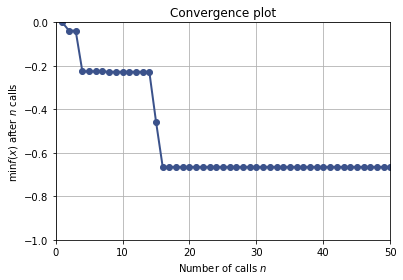

In [29]:
import matplotlib.pyplot as plt
plot_convergence(res);
plt.ylim(-1, 0)
plt.xlim(0, 50)

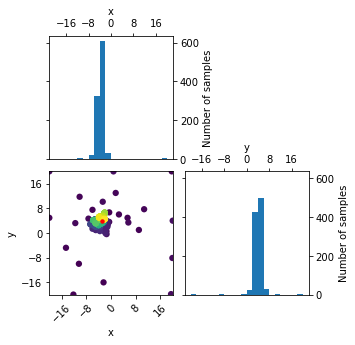

In [8]:
plot_evaluations(res);

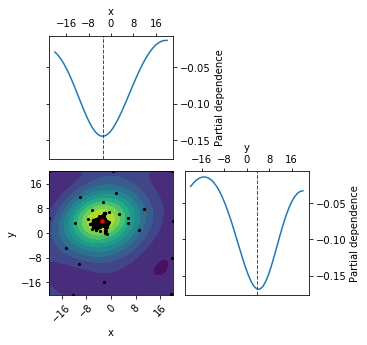

In [9]:
plot_objective(res);

In [10]:
res.x

[-2.8574789718594857, 3.7796316261181673]

In [13]:
res.fun

-0.6648766994476318

In [24]:
optimized_function(res.x)

-0.43130213022232056